In [4]:
import pandas as pd
import requests
import time

In [2]:
import pandas as pd
import re
import jieba

In [3]:
import codecs,sys

In [4]:
from wordcloud import WordCloud

In [5]:
zid = []  # 保存用户id
ztime = []  # 保存用户发表评论的时间
zname = []  # 保存用户姓名
zcomment = []  # 保存用户评论内容
totals = []  # 记录评论的总条数

In [6]:
def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
    time_array = time.localtime(time_stamp)
    str_date = time.strftime(format_string, time_array)
    return str_date

In [7]:
page = 0
url = "https://www.zhihu.com/api/v4/questions/489382506/answers"
#https://www.zhihu.com/api/v4/questions/489382506/answers?include=data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled
#&offset=&limit=3&sort_by=default&platform=desktop
# 必须添加cookie 信息
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0',
           "cookie": '_zap=7a1c6dab-1410-4313-aba2-c21e63d4d24d; d_c0="ALBe4YrmXROPToc04XpfiZc3Myzrf2nUssE=|1625499074"; _9755xjdesxxd_=32; YD00517437729195:WM_TID=xBFS3dpOnahAAVBFUFd+ziPyO2LQFXf6; gdxidpyhxdE=ha6g16ufKq7bDG25EzTlc3enj+aDZyEoSsOn47yofa9X8s1yV5KlMjmKNiO7XLZqL69SX2K4BwV+VzI7kShK1L/s1lHOhv3QALUmVlnMw7n66ffCJNAAmfQK58qzvjBfrA4QHZSClVQjSJWt/rVUo0jKRhVhtX7iB5klEI1bw4lW7tao:1629623057077; YD00517437729195:WM_NI=KbT7tndxlVL5yOk4MBZcWcm9fF/6kNPnyP6iy0A8d2SAKW6wBuuakX+cOQ+BiAsTYcfTte6hjMUwDUG2AjYHt90hFLyftSCd1TtTt6f1wEEx6iDEyro8htlDYRWIplN4RnA=; YD00517437729195:WM_NIKE=9ca17ae2e6ffcda170e2e6ee94c73aa7ae9baed17aa9bc8fa3d85a929e9e85f13af2a7a6a7d34da2aebfdaca2af0fea7c3b92a89be9cd8f766a8a8a4b7cf3fbb91a5d5d04a9abd9984f033a69ae1d7ea4694b2b7b1b563bbf08fd9e73a919f85b8b57d82abbb82ea54e9bd81b2aa4aab9fbdb5dc69a68cbc86b564aa939b98c75f85ee8f8bdc44b8e70089c548bbbabcb4c270f38cbcb5f73ea6efb9a6c874f6b78ca6fc7aade8a895ef509b8e99aaf3688eec9e8fc437e2a3; z_c0="2|1:0|10:1629622193|4:z_c0|92:Mi4xdEJCR0hRQUFBQUFBc0Y3aGl1WmRFeVlBQUFCZ0FsVk5zVjBQWWdEVVVXUFJWdHBMRXczY1pxdzNQZzktcktSVTlR|c06a6314c75f1df1547f987fa7a6ac723bbebb1cd9bdb0aa835984f1351a45bb"; tst=r; _xsrf=5323ede2-37cd-4ef8-b1ee-18bcc1211315; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1637746350,1637748911,1637749229,1637759080; NOT_UNREGISTER_WAITING=1; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1637763653; KLBRSID=53650870f91603bc3193342a80cf198c|1637764329|1637759078',
           }
data = {
    "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
    "limit": "5",  #&offset=&limit=3&sort_by=default&platform=desktop
    "offset": str(page),
    "platform": "desktop",
    "sort_by": "default"
}
resp = requests.get(url=url, params=data, headers=headers)
##知乎真是🐕，相同的代码就爬不了话题主页，只能爬问答
data_html = resp.json()  # 返回 json 信息， 5个用户一页，保存为字典类型
resp.close()##关闭爬虫

In [ ]:
type(data_html)

In [ ]:
for i in data_html["data"]:
    id = i['author']['id']
    name = i['author']['name']
    comment = re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i["content"]))
    time_ = timestamp_to_date(i["created_time"])
    # print(name + str(id) + ":" + comment)
    zid.append(id)
    ztime.append(time_)
    zname.append(name)
    zcomment.append(comment)

In [ ]:
totals_ = data_html["paging"]["totals"]  # 评论总条数
totals.append(totals_)
# print(totals[0])
totals[0]

In [12]:
v = list(zip(zid, ztime, zname, zcomment))
print(v)
pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国与祖国强大.xls")

[('e3accff73212c1c390123f5b1d3379a8', '2021-09-29 12:52:25', '叫我老抽', '宣布996违法'), ('0280add9ab6704ed2accc8645880a3b6', '2021-09-29 07:42:48', 'the Lake', '如图'), ('db7e50261033f5df0744531becc154a2', '2021-11-05 19:40:53', '人间陪审员孙达雱', '这已经不是中国第一次发挥坚强后盾作用了。\n2018 年上映的《红海行动》狂轰 36.52 亿元，成为当年的票房赢家。\n电影讲述的是中国海军「蛟龙突击队」在执行撤侨任务时与恐怖分子发生激烈交锋，最终惨胜的故事。\n而故事的背景就是取自「也门撤侨」这一真实事件。\n\n<em>红海行动</em>\n从 2011 到 2021 年这十年的时间内，我国有两次轰动世界的撤侨事件。\n一次是 2011 年的利比亚撤侨，一次就是 2015 年的也门撤侨。\n也门撤侨是我国首次武装撤侨行动，也是我国首次在战争背景下的国际人道主义救援行动，意义重大。\n通过这样一场坚定有力的国家行动，向全世界展示了中国力量和中国速度，让全世界记住了：在中国，人民的利益永远高于一切！\n\n<strong>一</strong> <strong>死神的阴影</strong> \n2015 年 3 月 27 日星期五，也门共和国。\n26 岁的中国女生雅丽一大早急匆匆地跑进单位办公室，打开电脑查看新闻。\n此刻她正身处距离中国 5929 公里（直线飞行距离）的也门阿比扬省，新闻里出现的一幕幕让她愈发不安：多地遭受战火荼毒，爆炸、枪战、抢劫，满眼尽是人们的哀嚎，熊熊燃烧的建筑，不断增加的死亡人数，这个国家乱套了。\n她想回国，但回不去了。\n2 年前，雅丽从中国来到了也门工作，在一家合资水泥厂担任翻译。\n没成想，2 个多月前，也门当地的反政府武装势力「胡塞武装」在首都萨那与也门政府武装发生冲突，造成近百人死伤。\n\n<em>城市废墟</em>\n随即，冲突愈演愈烈，胡塞武装占领了首都萨那，把总统软禁了起来。\n整个也门进入了无政府状态，战争的阴影又笼罩在这个不幸的国家上，多国驻也门使馆陆续关闭。\n此时，战火已经蔓延到了亚丁，距离雅丽工作的水

<ipython-input-12-15756e584085>:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国与祖国强大.xls")


## 前面都在调试，后面正式开始

In [8]:
def zhuhuSipder(page):
    url = "https://www.zhihu.com/api/v4/questions/489382506/answers"
    #https://www.zhihu.com/api/v4/questions/488891947/answers?include=data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled&offset=&limit=3&sort_by=default&platform=desktop
    # 必须添加cookie 信息
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0',
               "cookie": '_zap=7a1c6dab-1410-4313-aba2-c21e63d4d24d; d_c0="ALBe4YrmXROPToc04XpfiZc3Myzrf2nUssE=|1625499074"; _9755xjdesxxd_=32; YD00517437729195:WM_TID=xBFS3dpOnahAAVBFUFd+ziPyO2LQFXf6; gdxidpyhxdE=ha6g16ufKq7bDG25EzTlc3enj+aDZyEoSsOn47yofa9X8s1yV5KlMjmKNiO7XLZqL69SX2K4BwV+VzI7kShK1L/s1lHOhv3QALUmVlnMw7n66ffCJNAAmfQK58qzvjBfrA4QHZSClVQjSJWt/rVUo0jKRhVhtX7iB5klEI1bw4lW7tao:1629623057077; YD00517437729195:WM_NI=KbT7tndxlVL5yOk4MBZcWcm9fF/6kNPnyP6iy0A8d2SAKW6wBuuakX+cOQ+BiAsTYcfTte6hjMUwDUG2AjYHt90hFLyftSCd1TtTt6f1wEEx6iDEyro8htlDYRWIplN4RnA=; YD00517437729195:WM_NIKE=9ca17ae2e6ffcda170e2e6ee94c73aa7ae9baed17aa9bc8fa3d85a929e9e85f13af2a7a6a7d34da2aebfdaca2af0fea7c3b92a89be9cd8f766a8a8a4b7cf3fbb91a5d5d04a9abd9984f033a69ae1d7ea4694b2b7b1b563bbf08fd9e73a919f85b8b57d82abbb82ea54e9bd81b2aa4aab9fbdb5dc69a68cbc86b564aa939b98c75f85ee8f8bdc44b8e70089c548bbbabcb4c270f38cbcb5f73ea6efb9a6c874f6b78ca6fc7aade8a895ef509b8e99aaf3688eec9e8fc437e2a3; z_c0="2|1:0|10:1629622193|4:z_c0|92:Mi4xdEJCR0hRQUFBQUFBc0Y3aGl1WmRFeVlBQUFCZ0FsVk5zVjBQWWdEVVVXUFJWdHBMRXczY1pxdzNQZzktcktSVTlR|c06a6314c75f1df1547f987fa7a6ac723bbebb1cd9bdb0aa835984f1351a45bb"; tst=r; _xsrf=5323ede2-37cd-4ef8-b1ee-18bcc1211315; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1637746350,1637748911,1637749229,1637759080; NOT_UNREGISTER_WAITING=1; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1637763653; KLBRSID=53650870f91603bc3193342a80cf198c|1637764329|1637759078',
               }
    data = {
        "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
        "limit": "5",  #&offset=&limit=3&sort_by=default&platform=desktop
        "offset": str(page),
        "platform": "desktop",
        "sort_by": "default"
    }
    resp = requests.get(url=url, params=data, headers=headers)
    data_html = resp.json()  # 返回 json 信息， 5个用户一页
    resp.close()##关闭爬虫
    # 将毫秒数变成 日期格式
    def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
        time_array = time.localtime(time_stamp)
        str_date = time.strftime(format_string, time_array)
        return str_date
    for i in data_html["data"]:
        id = i['author']['id']
        name = i['author']['name']
        ##用正则表达式解析
        comment = re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i["content"]))
        time_ = timestamp_to_date(i["created_time"])
        zid.append(id)
        ztime.append(time_)
        zname.append(name)
        zcomment.append(comment)
 
    totals_ = data_html["paging"]["totals"]  # 评论总条数
    totals.append(totals_)
    return totals[0]

In [9]:
# 多页爬虫
def mulitypage():
    page = 0
    zhuhuSipder(page)##第一页的地方单独爬取
    time.sleep(10)
    while (page < totals[0]):##啥时候回停止？
        print("正在抓取第{}页".format(int(page / 5)))
        page += 5
        zhuhuSipder(page)

In [10]:
# 保存数据
def savedata():
    v = list(zip(zid, ztime, zname, zcomment))
    print(v)
    pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国与祖国强大.xls")

In [11]:
 if __name__ == "__main__":
    mulitypage()
    savedata()

正在抓取第0页
正在抓取第1页
正在抓取第2页
正在抓取第3页
正在抓取第4页
正在抓取第5页
正在抓取第6页
正在抓取第7页
正在抓取第8页
正在抓取第9页
正在抓取第10页
正在抓取第11页
正在抓取第12页
正在抓取第13页
正在抓取第14页
正在抓取第15页
正在抓取第16页
正在抓取第17页
正在抓取第18页
正在抓取第19页
正在抓取第20页
正在抓取第21页
正在抓取第22页
正在抓取第23页
正在抓取第24页
正在抓取第25页
正在抓取第26页
正在抓取第27页
正在抓取第28页
正在抓取第29页
正在抓取第30页
正在抓取第31页
正在抓取第32页
正在抓取第33页
正在抓取第34页
正在抓取第35页
正在抓取第36页
正在抓取第37页
正在抓取第38页
正在抓取第39页
正在抓取第40页
正在抓取第41页
正在抓取第42页
正在抓取第43页
正在抓取第44页
正在抓取第45页
正在抓取第46页
正在抓取第47页
正在抓取第48页
正在抓取第49页
正在抓取第50页
正在抓取第51页
正在抓取第52页
正在抓取第53页
正在抓取第54页
正在抓取第55页
正在抓取第56页
正在抓取第57页
正在抓取第58页
正在抓取第59页
正在抓取第60页
正在抓取第61页
正在抓取第62页
正在抓取第63页
正在抓取第64页
正在抓取第65页
正在抓取第66页
正在抓取第67页
正在抓取第68页
正在抓取第69页
正在抓取第70页
正在抓取第71页
正在抓取第72页
正在抓取第73页
正在抓取第74页
正在抓取第75页
正在抓取第76页
正在抓取第77页
正在抓取第78页
正在抓取第79页
正在抓取第80页
正在抓取第81页
正在抓取第82页
正在抓取第83页
正在抓取第84页
正在抓取第85页
正在抓取第86页
正在抓取第87页
正在抓取第88页
正在抓取第89页
正在抓取第90页
正在抓取第91页
正在抓取第92页
正在抓取第93页
正在抓取第94页
正在抓取第95页
正在抓取第96页
正在抓取第97页
正在抓取第98页
正在抓取第99页
正在抓取第100页
正在抓取第101页
正在抓取第102页
正在抓取第103页
正在抓取第104页
正在抓取第105页
正在抓取第106页
正在抓取第107页
正在抓取第108页
正在抓取第109页
正在抓取第110页


数据收集部分结束,下面开始分词处理

!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

In [ ]:
df = pd.read_excel("孟晚舟回国与祖国强大.xlsx")
comment = df["comment"]
comment

In [ ]:
rawdata = []
for i in  comment:
    comment_line = i
    rawdata.append(comment_line)
#不迭代的后果就是mytext的输出结果如下，呜呜呜呜，它中间的部分真的就保存为省略号了

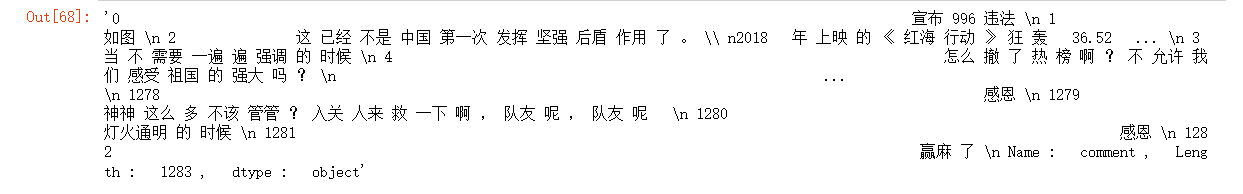

In [14]:
with open("title.txt","r",encoding ="utf_8") as title:
    title_text = title.read()##.read()是读取全部，.readline()是读取一行

In [15]:
mytext = " ".join(jieba.lcut(str(title_text)))##jieba.lcut的参数是字符串
#mytext

In [16]:
mytext

'孟晚 舟 获释 回国 ， 对华 为 而言 意味着 什么 ？ 对华 为 有 哪些 影响 ？ \n 外交部 谈孟晚 舟 回国 称 ， 「 强大 的 祖国 永远 是 每 一位 中国 公民 的 坚强 后盾 」 ， 你 有 哪一刻 感受 到 祖国 的 强大 ？ \n 孟晚 舟 已 乘坐 中国政府 包机 离开 加拿大 ， 即将 回到 祖国 ， 对此 你 有 什么 想 说 的 ？ \n 孟晚 舟 获释 回国 事件 中 ， 有 哪些 法律 问题 值得 关注 ？ 如何 从 法律 角度 进行 解读 ？ \n 如何 看待 孟晚 舟 女士 获释 演讲 「 感谢 祖国 和 人民 的 支持 」 ？ \n 孟晚 舟 隔离 期 结束 已回 华为 上班 ， 对华 为 将 起到 哪些 作用 ？ \n 9 月 25 日孟晚 舟 抵达 深圳 ， 感言 「 如果 信念 有 颜色 那 一定 是 中国 红 」 ， 现场 高唱 《 歌唱祖国 》 ， 你 有 什么 感触 ？ \n 孟晚 舟 已经 乘坐 中国政府 包机 离开 加拿大 ， 即将 回到 祖国 ， 有 哪些 值得 关注 的 信息 ？ \n 如何 看待 媒体 评述 「 孟晚 舟 平安 回家 是 中国 国家 实力 的 象征 」 ？ \n 如何 评价 乌合 麒麟 为 孟晚 舟 回国 创作 的 作品 《 归舟 》 ？ \n 孟晚 舟 获释 回国 ， 美国 此时 与 孟晚 舟 达成协议 ， 背后 的 动机 与 考虑 是 什么 ？ 是否 意味着 对华关系 的 缓和 ？ \n 孟晚 舟 以 不 认罪 方式 进行 获释 ， 意味着 什么 ， 背后 有 哪些 不为人知 的 努力 ？ \n 如何 看待 孟晚 舟 律师 发表声明 ， 「 期待 14 个 月 后 对 她 的 指控 被 完全 撤销 」 ？ \n 孟晚 舟游 张家界 喝 「 拦门 酒 」 ， 网友 热议 「 祖国 山水 最美 ， 也 最 安全 」 ， 祖国 的 山水 究竟 有多美 ？ \n 孟晚 舟案 美国司法部 与其 达成 延迟 起诉 协议 意味着 什么 ？ 为何 要 等到 明年 年底 才 完全 驳回 起诉 ？ \n'

分词结束，下面开始停用词处理

In [17]:
##新建一个txt文件，单独提取comment的部分，用来去停用词做目标文件
filename = "title.txt"
with open(filename, 'w',encoding='utf_8') as f:
    f.write(mytext)

In [18]:
#处理停用词
def stopWord(sourceFile,targetFile,stopkey):
    sourcef = codecs.open(sourceFile, 'r', encoding='utf-8')
    targetf = codecs.open(targetFile, 'w', encoding='utf-8')
    #print 'open source file: '+ sourceFile
    #print 'open target file: '+ targetFile
    lineNum = 1
    line = sourcef.readline()
    while line:
        #print '---processing ',lineNum,' article---'
        sentence = delstopword(line,stopkey)
        #print sentence
        targetf.writelines(sentence + '\n')       
        lineNum = lineNum + 1
        line = sourcef.readline()
    #print 'well done.'
    sourcef.close()
    targetf.close()

In [19]:
#删除停用词
def delstopword(line,stopkey):
    wordList = line.split(' ')          
    sentence = ''
    for word in wordList:
        word = word.strip()
        if word not in stopkey:
            if word != '\t':
                sentence += word + " "
    return sentence.strip()

In [21]:
if __name__ == '__main__':
    stopkey = [w.strip() for w in codecs.open('stopWord.txt', 'r', encoding='utf-8').readlines()]
    sourceFile = filename
    targetFile = 'title_cut_stopword.txt'
    stopWord(sourceFile,targetFile,stopkey)

In [22]:
with open(targetFile, 'r',encoding='utf_8') as f:
    lines = f.read() 

In [23]:
lines

'孟晚 舟 获释 回国 对华 意味着 对华 影响\n外交部 谈孟晚 舟 回国 称 「 强大 祖国 永远 一位 中国 公民 坚强 后盾 」 哪一刻 感受 祖国 强大\n孟晚 舟 已 乘坐 中国政府 包机 离开 加拿大 回到 祖国 对此 想 说\n孟晚 舟 获释 回国 事件 中 法律 问题 值得 关注 法律 角度 进行 解读\n看待 孟晚 舟 女士 获释 演讲 「 感谢 祖国 支持 」\n孟晚 舟 隔离 期 结束 已回 华为 上班 对华 起到 作用\n月 25 日孟晚 舟 抵达 深圳 感言 「 信念 颜色 一定 中国 红 」 现场 高唱 歌唱祖国 感触\n孟晚 舟 已经 乘坐 中国政府 包机 离开 加拿大 回到 祖国 值得 关注 信息\n看待 媒体 评述 「 孟晚 舟 平安 回家 中国 国家 实力 象征 」\n评价 乌合 麒麟 孟晚 舟 回国 创作 作品 归舟\n孟晚 舟 获释 回国 美国 此时 孟晚 舟 达成协议 背后 动机 考虑 是否 意味着 对华关系 缓和\n孟晚 舟 认罪 方式 进行 获释 意味着 背后 不为人知 努力\n看待 孟晚 舟 律师 发表声明 「 期待 14 月 后 指控 完全 撤销 」\n孟晚 舟游 张家界 喝 「 拦门 酒 」 网友 热议 「 祖国 山水 最美 最 安全 」 祖国 山水 有多美\n孟晚 舟案 美国司法部 达成 延迟 起诉 协议 意味着 明年 年底 完全 驳回 起诉\n'

停用词处理结束，下面开始创造词云

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

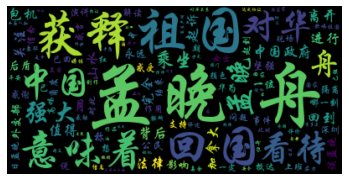

In [24]:
wordcloud = WordCloud(font_path="C:\Windows\Fonts\STXINGKA.TTF").generate(lines)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [25]:
image_produce = wordcloud.to_image()
image_produce.show()

In [5]:
df = pd.read_excel("孟晚舟回国对华为影响2.xlsx")
time = df["time"]
time

0      2021-09-26 06:55:32
1      2021-09-26 21:45:35
2      2021-09-29 17:28:47
3      2021-09-28 21:29:40
4      2021-09-29 19:35:46
              ...         
900    2021-09-26 00:17:54
901    2021-09-25 19:30:12
902    2021-10-05 11:28:37
903    2021-10-27 23:38:02
904    2021-10-03 10:04:05
Name: time, Length: 905, dtype: object

In [6]:
type(time)

pandas.core.series.Series

In [11]:
time[0][5:10]

'09-26'

In [10]:
time_clear = []

In [12]:
for i in range(904):
    time_clear.append(time[i][5:10])

In [13]:
time_clear

['09-26',
 '09-26',
 '09-29',
 '09-28',
 '09-29',
 '09-25',
 '09-26',
 '09-25',
 '11-03',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-28',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-28',
 '09-25',
 '09-25',
 '09-25',
 '09-26',
 '09-25',
 '09-26',
 '09-25',
 '09-26',
 '09-25',
 '09-26',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-26',
 '09-25',
 '09-26',
 '09-25',
 '09-25',
 '09-28',
 '09-25',
 '09-26',
 '09-25',
 '09-25',
 '09-26',
 '09-30',
 '09-28',
 '09-28',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-26',
 '09-26',
 '09-25',
 '09-25',
 '10-26',
 '10-26',
 '09-26',
 '09-25',
 '09-26',
 '10-02',
 '09-26',
 '09-25',
 '09-25',
 '09-25',
 '09-26',
 '09-26',
 '09-25',
 '09-25',
 '09-26',
 '09-26',
 '09-25',
 '09-27',
 '09-26',
 '09-25',
 '09-26',
 '09-25',
 '09-26',
 '09-26',
 '09-26',
 '09-26',
 '09-25',
 '10-09',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-25',
 '09-26',
 '09-25',


In [22]:
time_clear[0].split("-")

['09', '26']

In [24]:
t_month = time_clear[0].split("-")[0]

In [25]:
t_month

'09'

In [26]:
int(t_month)

9

In [ ]:
tw_fine = 0

In [ ]:
t_date

In [ ]:
for i in range(904):
    if int(time_clear[i].split("-")[0]) == 9:
        